In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils.galdist import GalacticDistribution
import astropy.units as u
import gala.potential as gp
import gala.dynamics as gd

In [2]:
sp_dist = GalacticDistribution()
gal_pot = gp.MilkyWayPotential2022()

In [3]:
Npsr = 10000

psr_x, psr_y, psr_z = sp_dist.gen_XYZ(Npsr)
psr_vx, psr_vy, psr_vz = sp_dist.gen_VXVYVZ(Npsr) * u.km / u.s
psr_xyz = np.array([psr_x, psr_y, psr_z])

lsr_vphi = gal_pot.circular_velocity(psr_xyz)
psr_phi = np.arctan2(psr_x, psr_y)

psr_vx += lsr_vphi * np.cos(psr_phi)
psr_vy += -lsr_vphi * np.sin(psr_phi)
psr_vxvyvz = np.array([psr_vx, psr_vy, psr_vz])

init = gd.PhaseSpacePosition(
    pos=psr_xyz * u.kpc,
    vel=psr_vxvyvz * u.km / u.s,
)

In [4]:
tmin = 0
tmax = 1 * u.Gyr
dt = 1 * u.Myr

orbits = gal_pot.integrate_orbit(init, dt=dt, t1=tmin, t2=tmax)

[None,
 (-20.0, 20.0),
 (-20.0, 20.0),
 Text(0.5, 0, '$x$ [kpc]'),
 Text(0, 0.5, '$y$ [kpc]')]

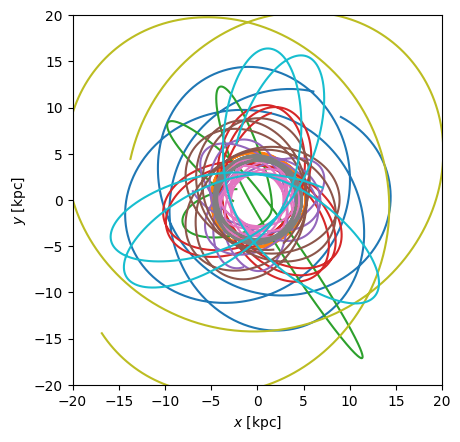

In [5]:
# pick specific psrs to plot orbits
idx = np.random.randint(Npsr, size=10)

fig, ax = plt.subplots()
ax.plot(orbits[:, idx].x, orbits[:, idx].y)
ax.set(
    aspect=1,
    xlim=(-20, 20),
    ylim=(-20, 20),
    xlabel=r"$x$ [kpc]",
    ylabel=r"$y$ [kpc]",
)

[None,
 (-20.0, 20.0),
 (-20.0, 20.0),
 Text(0.5, 0, '$x$ [kpc]'),
 Text(0, 0.5, '$y$ [kpc]'),
 Text(0.5, 1.0, '$t={10}$ Myr')]

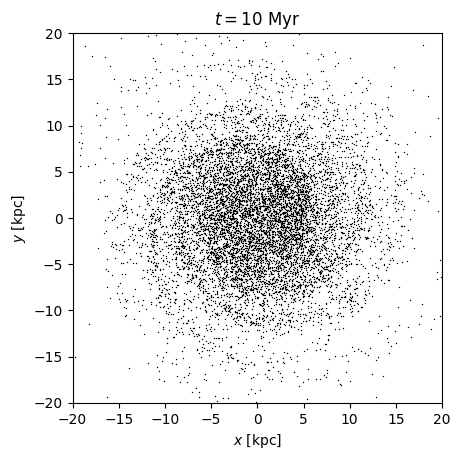

In [6]:
# pick specific time to plot positions
time = int(10 * u.Myr // dt)

fig, ax = plt.subplots()
ax.scatter(orbits[time].x, orbits[time].y, s=1, lw=0, c="k", marker="o")
ax.set(
    aspect=1,
    xlim=(-20, 20),
    ylim=(-20, 20),
    xlabel=r"$x$ [kpc]",
    ylabel=r"$y$ [kpc]",
    title=rf"$t={{{(time * dt).value:.0f}}}$ Myr",
)